In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_csv('../data/parkinsons.csv')
df.head(6)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


# Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
- status - The health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE, D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [143]:
df.shape

(195, 24)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [145]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


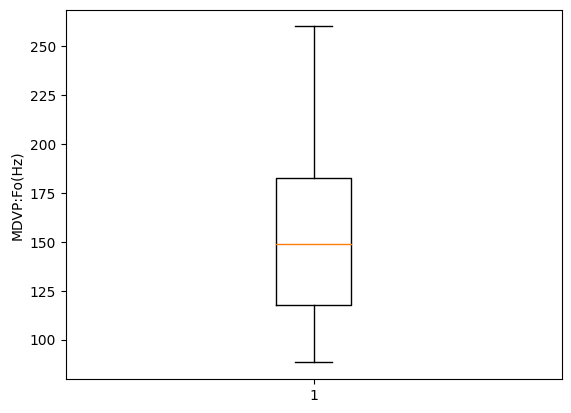

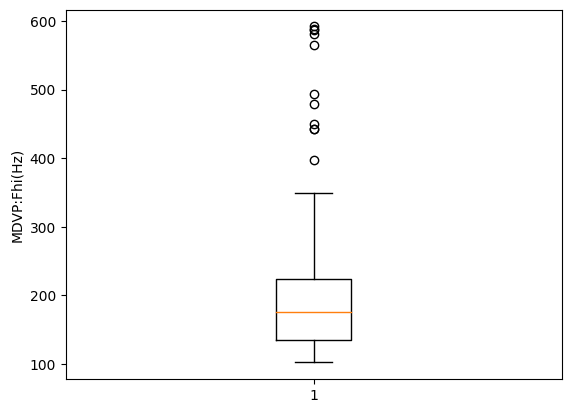

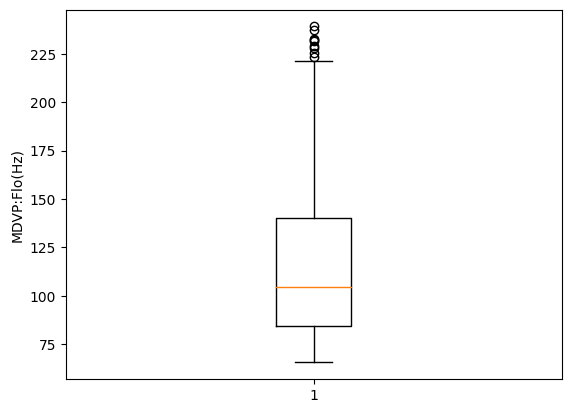

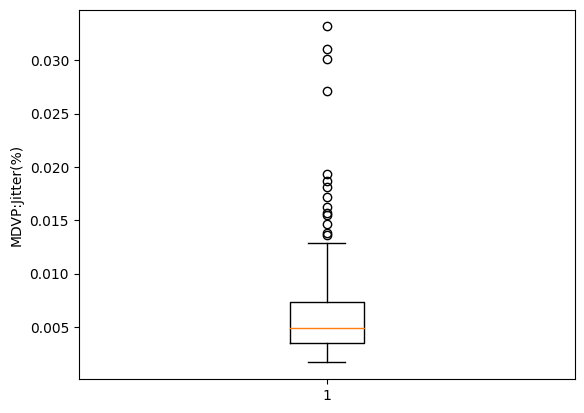

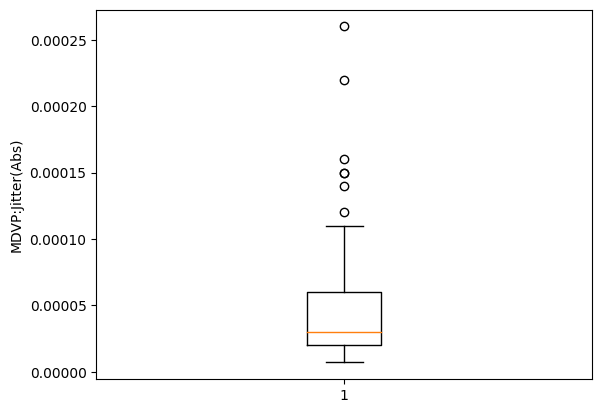

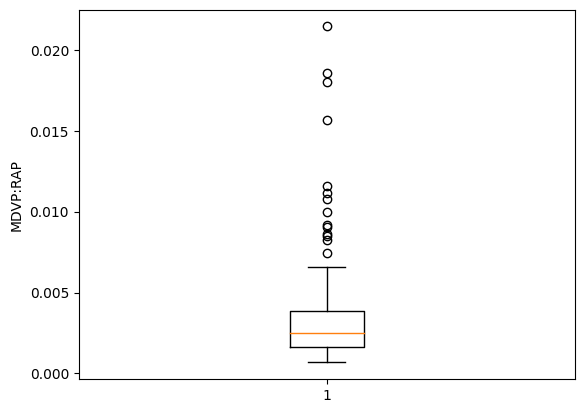

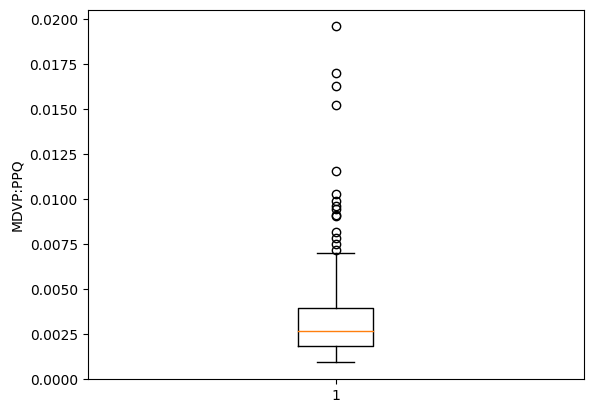

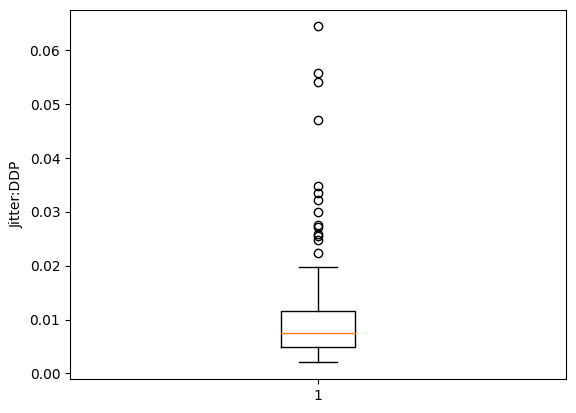

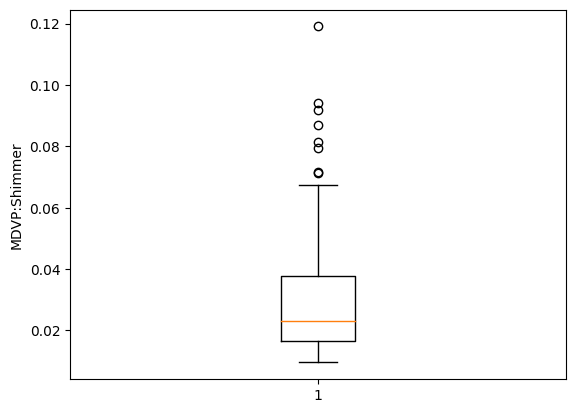

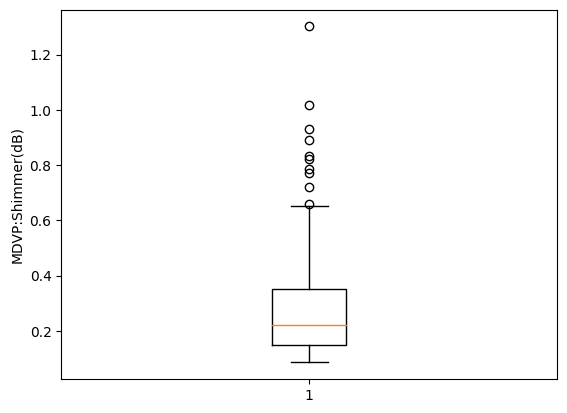

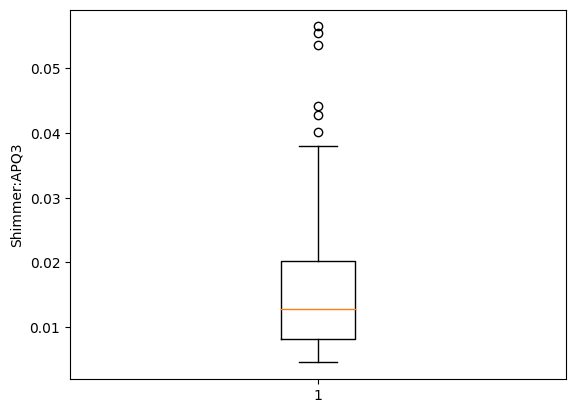

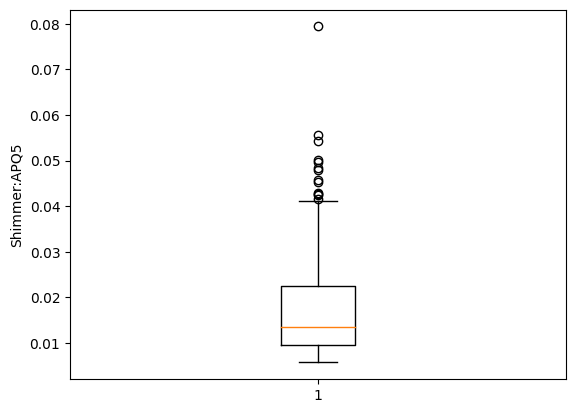

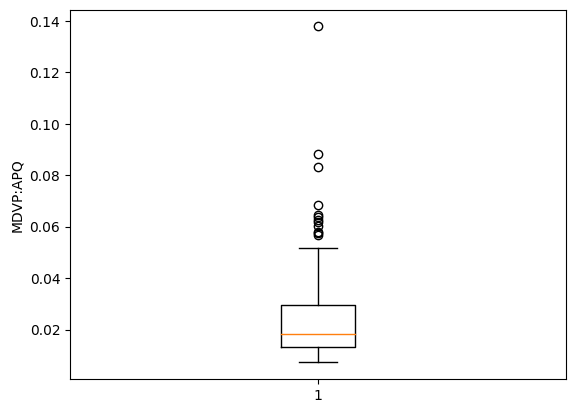

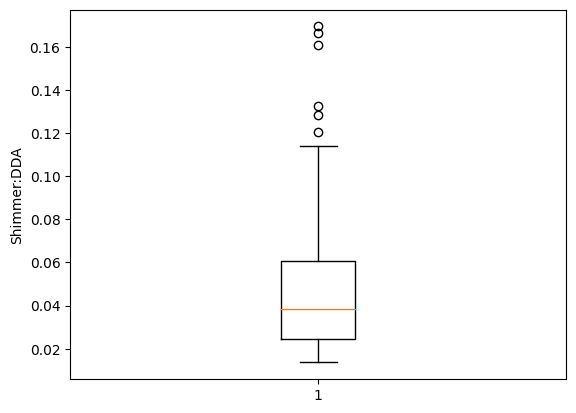

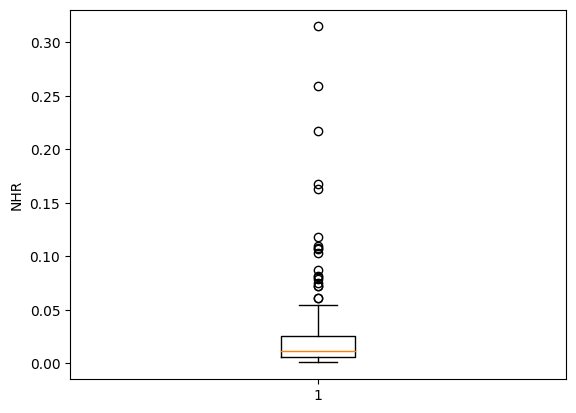

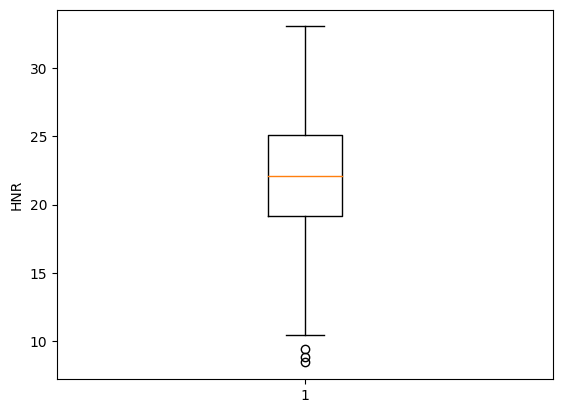

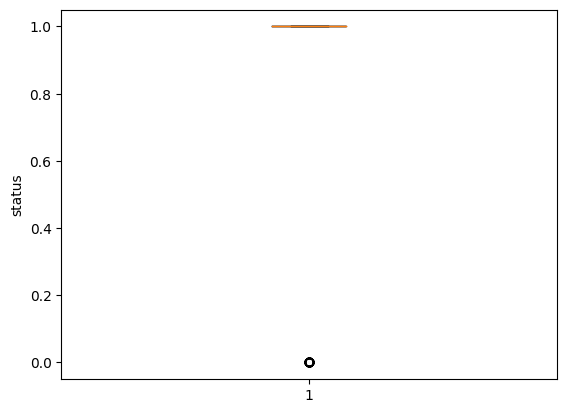

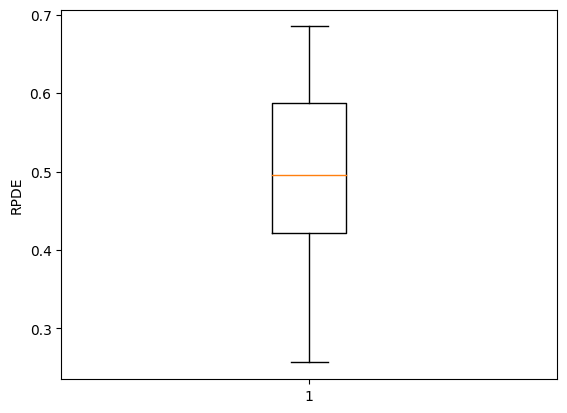

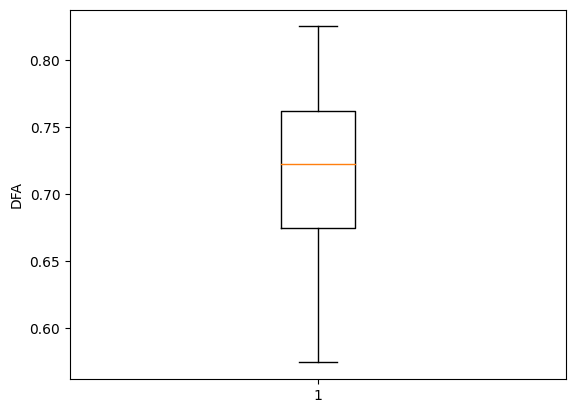

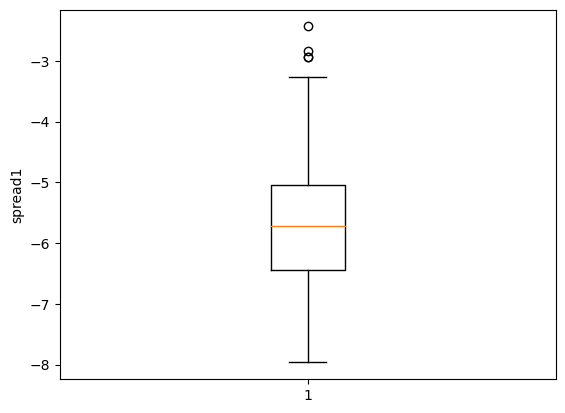

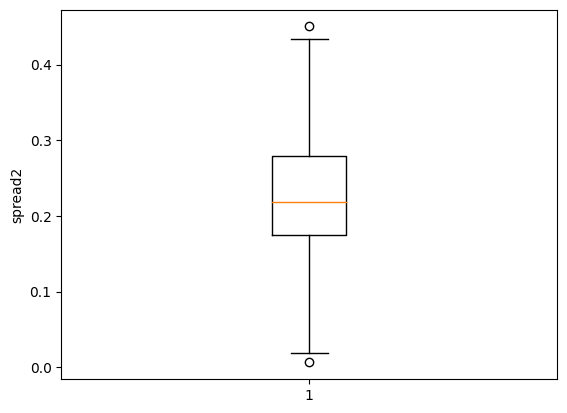

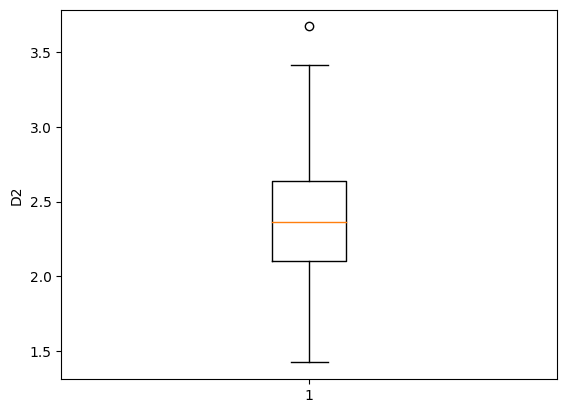

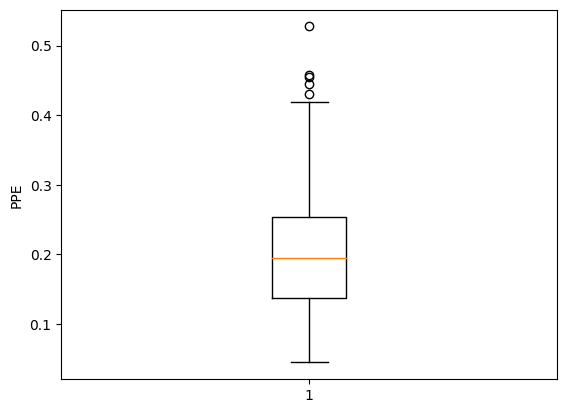

In [146]:
for i in df.columns[1:]:
    fig, ax = plt.subplots()
    ax.boxplot(df[i])
    plt.ylabel(i)

# df1 = df.drop('name', axis=1)
# plt.figure(figsize=(25,15))
# sns.boxplot(data= df1);

<AxesSubplot:ylabel='status'>

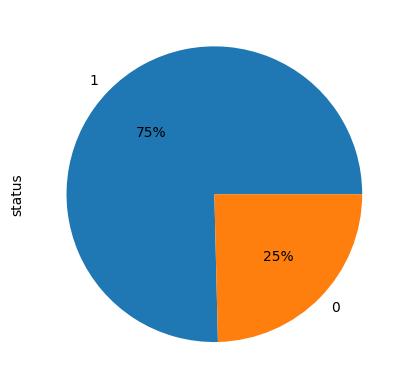

In [147]:
df['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [148]:
y = df['status']
y.unique()

array([1, 0], dtype=int64)

In [149]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'status'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,

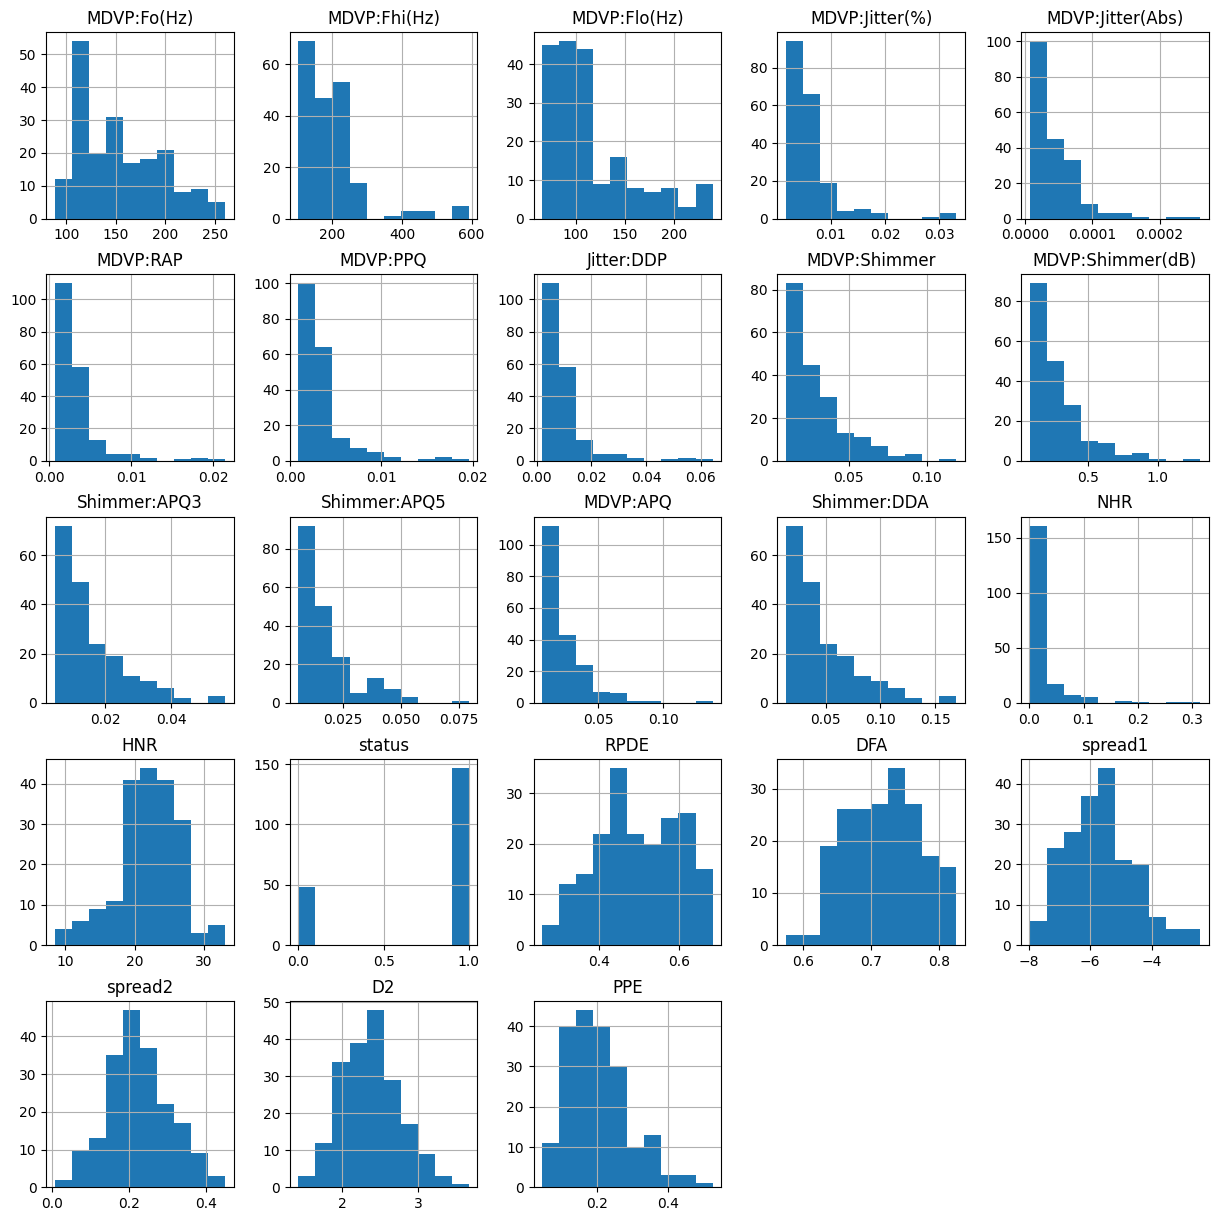

In [150]:
df.hist(figsize=(15,15))

In [151]:
print("Original shape of data: ", df.shape)
X = df.drop(['status','name'], axis=1)
print("Featues shape:", X.shape)
y = df.status
print("Target shape: ", y.shape)

Original shape of data:  (195, 24)
Featues shape: (195, 22)
Target shape:  (195,)


In [152]:
X.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

In [153]:
def get_pearson_corr_matrix(df: pd.DataFrame) -> pd.DataFrame:
    ### BEGIN SOLUTION
    return df.corr(method="pearson")
    ### END SOLUTION

In [154]:
# Tạo correlation matrix từ hàm đã viết
corr_matrix = get_pearson_corr_matrix(X)

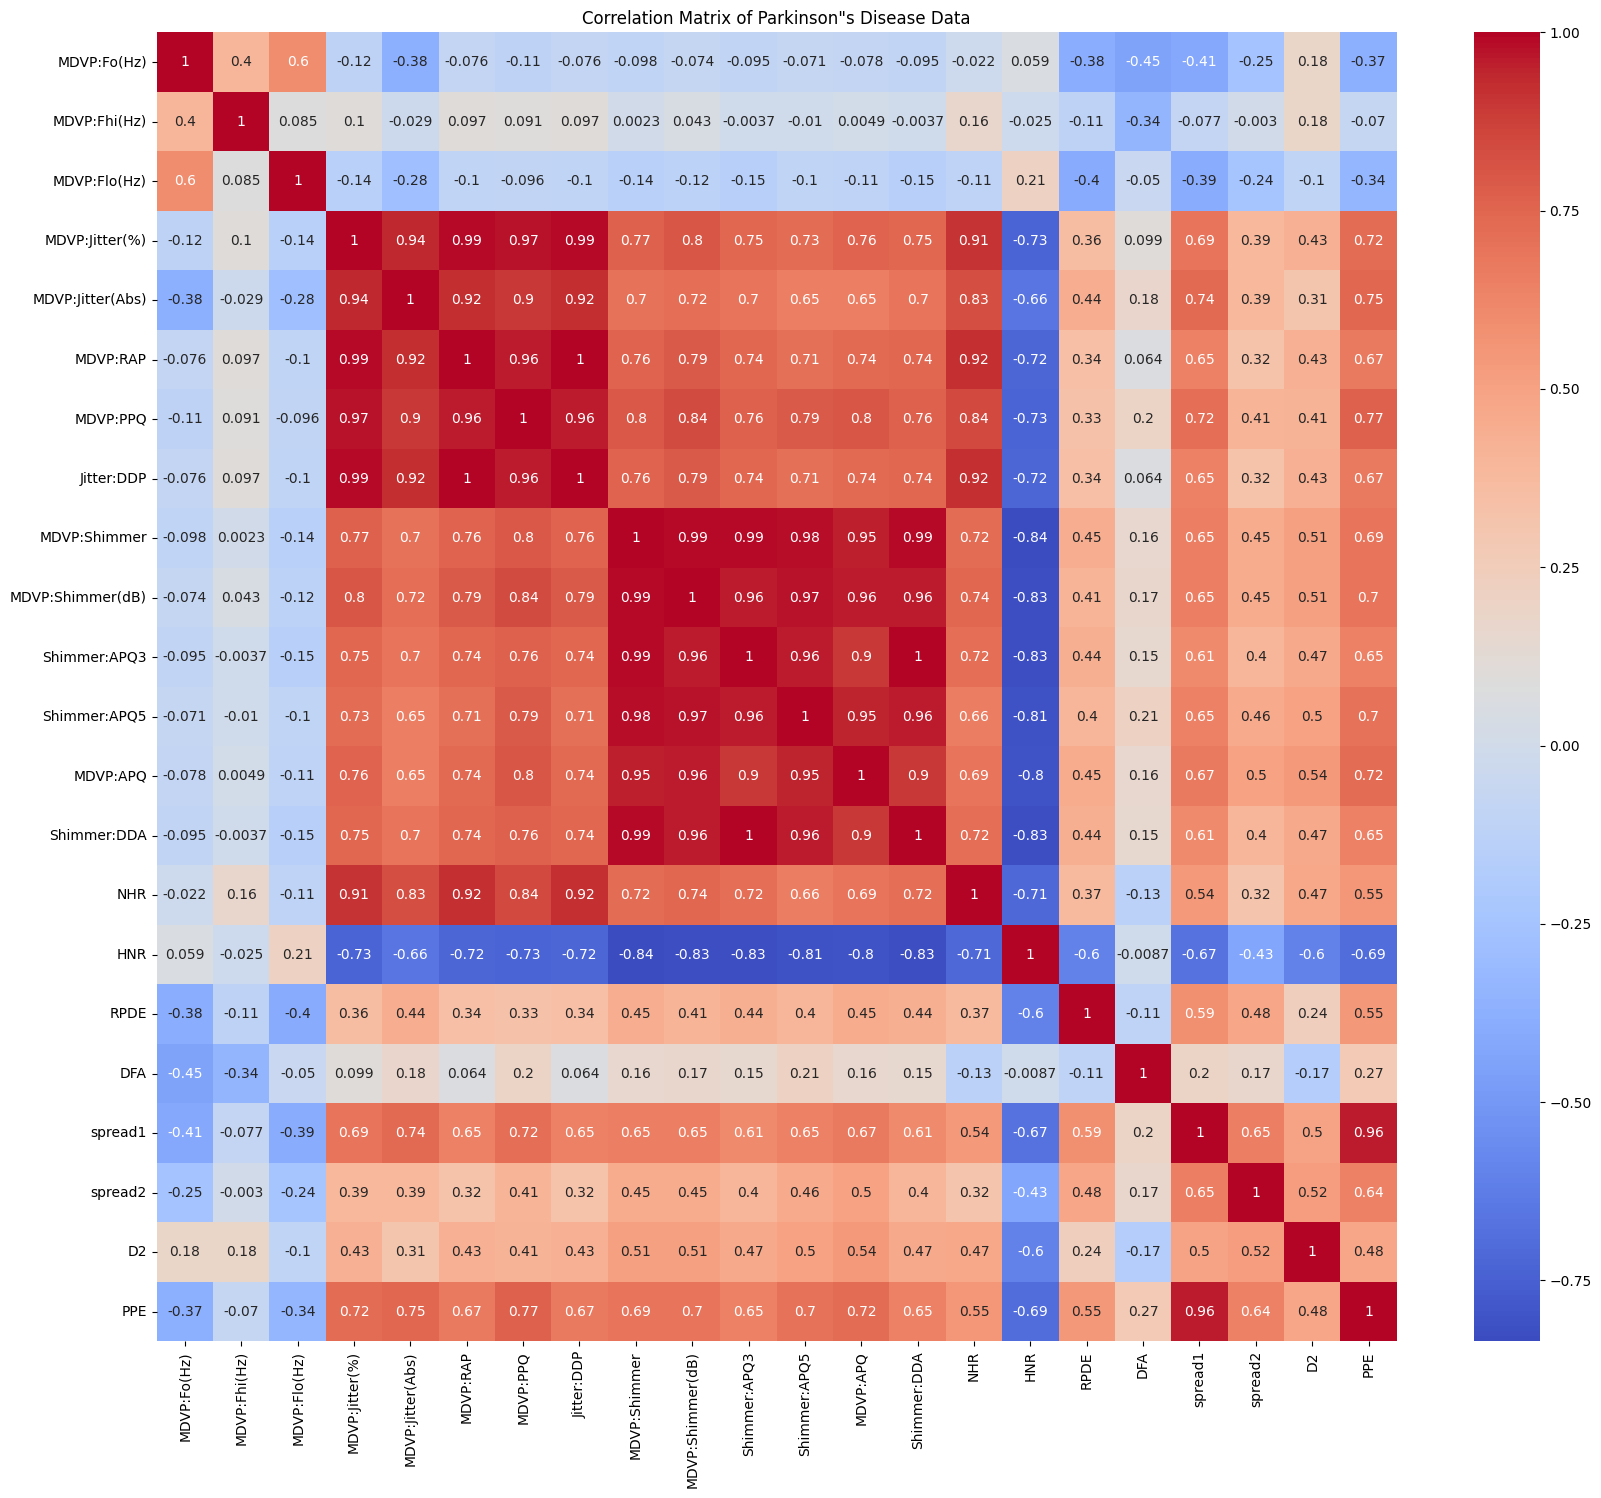

In [155]:
# Plot the correlation matrix
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Parkinson"s Disease Data')
plt.show()

In [156]:
def drop_highly_correlated_features(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    ### BEGIN SOLUTION
    target_col = "status" if "status" in df.columns else None
    feature_cols = [col for col in df.columns if col != target_col]
    
    corr_matrix = df[feature_cols].corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    retained_cols = [col for col in df.columns if col not in to_drop]
    return df[retained_cols]
    ### END SOLUTION

In [157]:
# Khởi tạo giá trị correlation_threshold là 0.7
correlation_threshold = 0.7
# Tiến hành loại bỏ những đặc trưng
X = drop_highly_correlated_features(X, correlation_threshold)

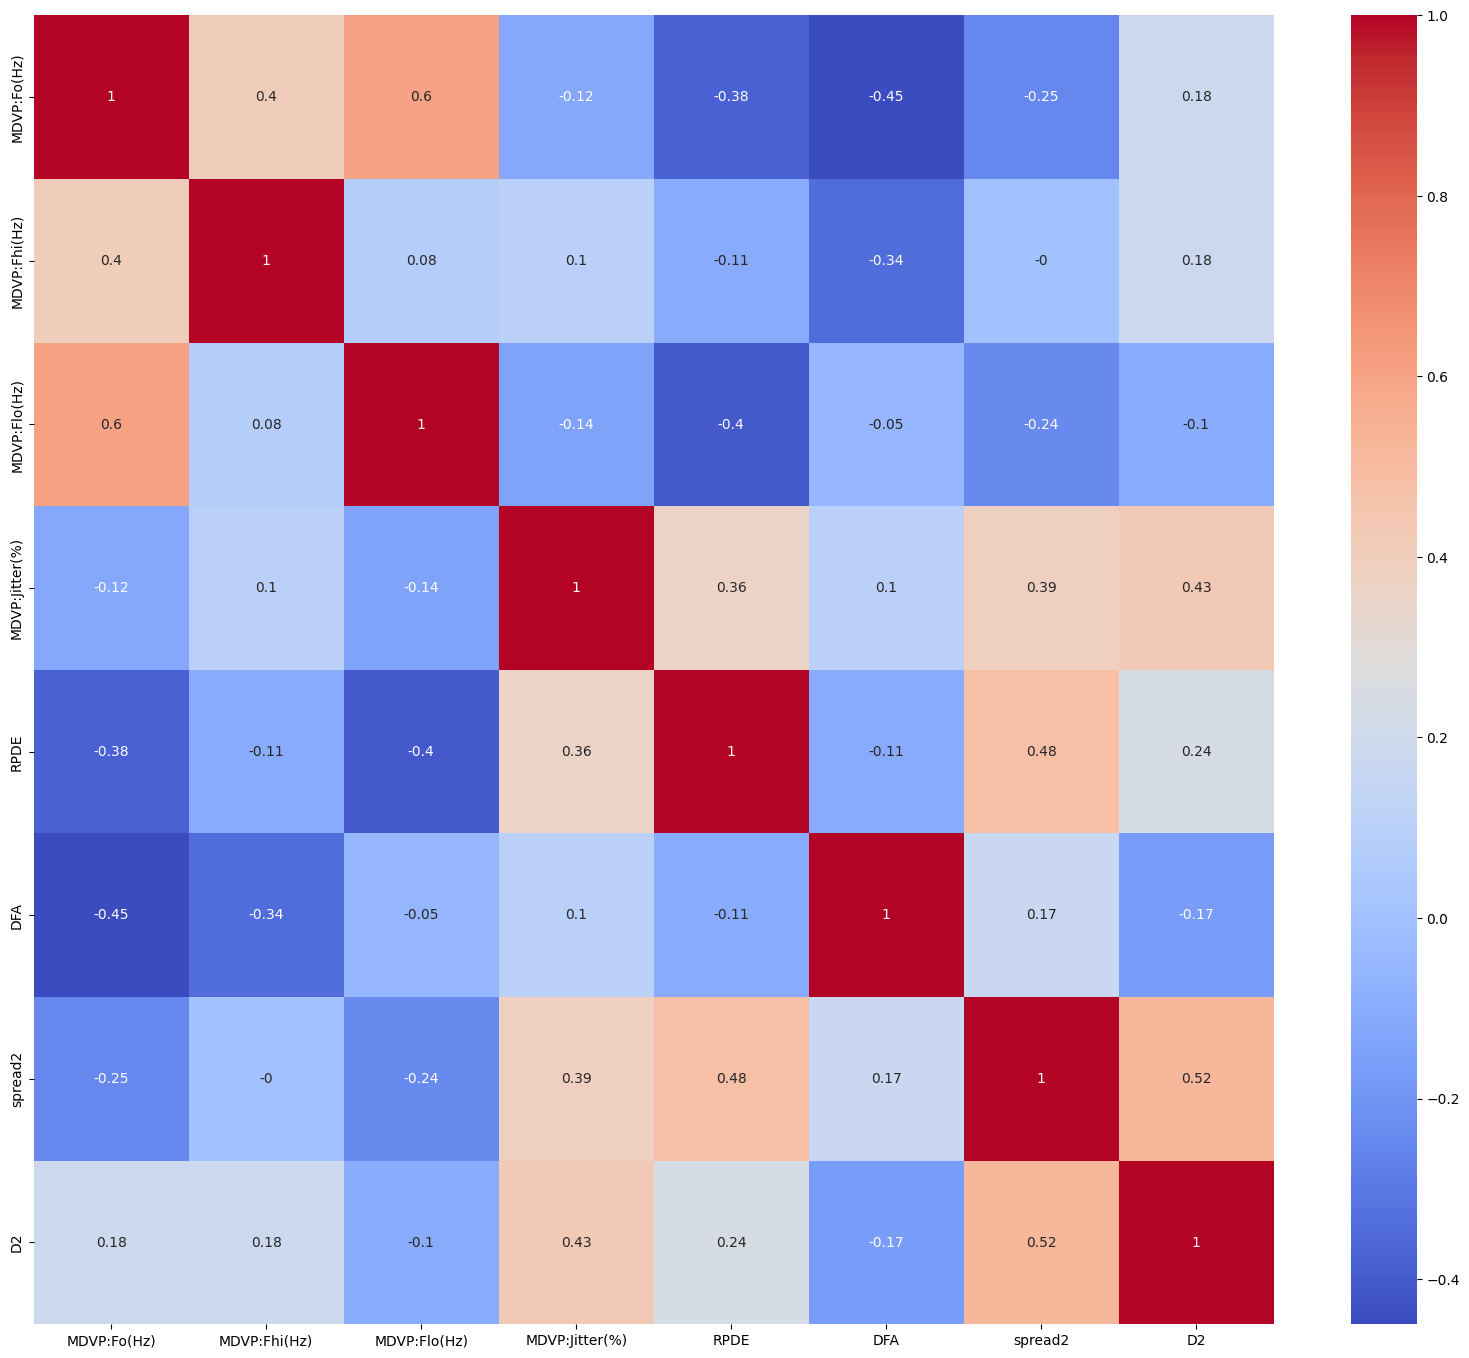

In [158]:
corr_matrix = get_pearson_corr_matrix(X)
plt.figure(figsize=(20,17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [159]:
print(X.columns)
print(len(X.columns))

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'RPDE',
       'DFA', 'spread2', 'D2'],
      dtype='object')
8


In [160]:
X.to_csv('../frontend/public/dap.csv',index=False)

In [161]:
df = pd.concat([X, y], axis=1)

# Lưu thành file CSV
df.to_csv("dap.csv", index=False)


In [162]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('dap.csv')
X = df.drop(['status'],axis = 1)
y = df['status']
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(X)

joblib.dump(scaler,'./model/scaler1.pkl')
print('\nScaler saved successfully!')



Scaler saved successfully!


In [163]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23520945)

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)
# train_pred_rf = rf.predict(X_train)
# pred_rf = rf.predict(X_test)
# print("Training Accuracy: ",accuracy_score(y_train, train_pred_rf))
# print("Test Accuracy: ",accuracy_score(y_test, pred_rf))

Training Accuracy:  1.0
Test Accuracy:  0.8974358974358975


In [ ]:
# print("Confusion Matrix: ")
# print(confusion_matrix(y_test, pred_rf))

# print("\nClassification Report:")
# print(classification_report(y_test, pred_rf))

Confusion Matrix: 
[[10  3]
 [ 1 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.89      0.96      0.93        26

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39



In [181]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 89.74%
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.89      0.96      0.93        26

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39



In [182]:
import joblib

# Save the trained model
joblib.dump(model, './model/parkinsons_xgboost_model.pkl')

['./model/parkinsons_xgboost_model.pkl']

In [183]:
# Load the model
model = joblib.load('./model/parkinsons_xgboost_model.pkl')
test_size = round(len(y_test)/1)
# Predict on new data
new_pred = model.predict(X_test[:test_size])
print(f'Predictions: {new_pred}')
a = 0
for i in range(len(new_pred)):
    if (new_pred[i] == y[i]):
        # print(f'Prediction {i+1} is correct')
        a+=1
print(f'keke {a} and {test_size} and acc is {a/test_size}')

Predictions: [1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 1 0]
keke 28 and 39 and acc is 0.717948717948718


tìm thông số tối ưu nè

In [ ]:
from sklearn.model_selection import GridSearchCV

# Định nghĩa các tham số cần tìm kiếm
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Tạo model với GPU (cách mới từ XGBoost 2.0.0)
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    tree_method='hist',     # Sử dụng phương pháp histogram
    device='cuda:0',
    n_jobs = 1# Chỉ định sử dụng CUDA/GPU 
)

# Tạo GridSearchCV - Đảm bảo dữ liệu và mô hình đều ở cùng thiết bị
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,                  # số fold cross-validation
    scoring = 'accuracy',    # đánh giá dựa trên accuracy
    n_jobs = 3,              # Đặt n_jobs=1 khi sử dụng GPU để tránh xung đột
    verbose = 2              # Tăng mức verbose để theo dõi tiến trình chi tiết hơn
)

# Fit model
grid_search.fit(X_train, y_train)

# Hiển thị tham số tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Sử dụng mô hình tốt nhất để dự đoán
best_model = grid_search.best_estimator_
# Đảm bảo thiết bị được đặt chính xác trước khi dự đoán
best_model.set_params(device='cuda')
y_pred = best_model.predict(X_test)

In [184]:
# Khởi tạo model XGBClassifier với các tham số cơ bản
model_riu = xgb.XGBClassifier(
    eval_metric='logloss',       # Metric đánh giá log loss
    tree_method='hist',          # Phương pháp histogram
    n_jobs=1                      # Sử dụng 1 core CPU (có thể tùy chỉnh hoặc sử dụng GPU nếu cần)
)

# Các tham số tối ưu (best parameters)
best_params = {
    'colsample_bytree': 0.8,      # Tỉ lệ các feature được sử dụng cho mỗi cây
    'gamma': 0,                   # Giới hạn độ sâu của cây
    'learning_rate': 0.05,        # Tốc độ học
    'max_depth': 5,               # Độ sâu tối đa của mỗi cây
    'min_child_weight': 1,         # Trọng số tối thiểu của các node con
    'n_estimators': 100,          # Số lượng cây trong mô hình
    'subsample': 1.0              # Tỉ lệ dữ liệu được sử dụng cho mỗi cây
}

# Cập nhật các tham số tối ưu vào model
model_riu.set_params(**best_params)


# Train the model
model_riu.fit(X_train, y_train)

# Predict
y_pred = model_riu.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')
print(classification_report(y_test, y_pred))

Accuracy: 89.74%
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.89      0.96      0.93        26

    accuracy                           0.90        39
   macro avg       0.90      0.87      0.88        39
weighted avg       0.90      0.90      0.90        39



In [ ]:
# import joblib

# # Save the trained model
# joblib.dump(model_riu, './model/best_model_w_grid.pkl')

In [172]:
# y_pred

In [ ]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2%}')
# print(classification_report(y_test, y_pred))

In [174]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Định nghĩa phạm vi tham số cần tìm kiếm
# param_dist = {
#     'n_estimators': np.arange(50, 500, 50),
#     'learning_rate': np.logspace(-3, 0, 10),
#     'max_depth': np.arange(3, 11),
#     'min_child_weight': np.arange(1, 6),
#     'gamma': np.linspace(0, 0.5, 10),
#     'subsample': np.linspace(0.6, 1.0, 5),
#     'colsample_bytree': np.linspace(0.6, 1.0, 5)
# }

# # Tạo model cơ bản
# xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# # Tạo RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=100,  # số lần thử ngẫu nhiên
#     cv=3,
#     scoring='accuracy',
#     verbose=1,
#     random_state=23520945
# )

# # Fit model
# random_search.fit(X_train, y_train)

# # Hiển thị tham số tốt nhất
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

# # Sử dụng mô hình tốt nhất
# best_model2 = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

In [175]:
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2%}')
# print(classification_report(y_test, y_pred))

In [176]:
# import joblib

# # Save the trained model
# joblib.dump(best_model2, './model/model_ran_ser.pkl')

In [177]:
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Định nghĩa phạm vi tham số cần tìm kiếm
# param_dist = {
#     'n_estimators': np.arange(50, 500, 50),
#     'learning_rate': np.logspace(-3, 0, 10),
#     'max_depth': np.arange(3, 11),
#     'min_child_weight': np.arange(1, 6),
#     'gamma': np.linspace(0, 0.5, 10),
#     'subsample': np.linspace(0.6, 1.0, 5),
#     'colsample_bytree': np.linspace(0.6, 1.0, 5)
# }

# # Tạo model với GPU
# xgb_model = xgb.XGBClassifier(
#     eval_metric='logloss',
#     tree_method='gpu_hist',  # Sử dụng GPU
#     gpu_id=0  # Chỉ định GPU ID nếu có nhiều GPU
# )

# # Tạo RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb_model,
#     param_distributions=param_dist,
#     n_iter=100,  # số lần thử ngẫu nhiên
#     cv=3,
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=4,
#     random_state=23520945
# )

# # Fit model
# random_search.fit(X_train, y_train)

# # Hiển thị tham số tốt nhất
# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_)

# # Sử dụng mô hình tốt nhất
# best_model2 = random_search.best_estimator_
# y_pred = best_model2.predict(X_test)

In [178]:
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2%}')
# print(classification_report(y_test, y_pred))

In [179]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV

# # Tạo LightGBM model với GPU
# lgb_model = lgb.LGBMClassifier(
#     boosting_type='gbdt',
#     objective='binary',
#     device='gpu',  # Chỉ định sử dụng GPU
#     gpu_platform_id=0,  # ID của platform GPU
#     gpu_device_id=0,    # ID của thiết bị GPU  
# )

# # Huấn luyện mô hình
# lgb_model.fit(X_train, y_train)

# # Tìm tham số tối ưu với GPU
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [31, 63, 127],
#     'max_depth': [-1, 5, 10],  # -1 là không giới hạn
# }

# # Tạo GridSearchCV với LightGBM GPU
# gpu_lgb_model = lgb.LGBMClassifier(
#     boosting_type='gbdt',
#     objective='binary',
#     device='gpu',
#     gpu_platform_id=0,
#     gpu_device_id=0
# )

# grid_search = GridSearchCV(
#     estimator=gpu_lgb_model,
#     param_grid=param_grid,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=1  # Với GPU processing, sử dụng n_jobs=1
# )

# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)

# # Sử dụng mô hình tốt nhất
# best_model3 = grid_search.best_estimator_
# y_pred = best_model3.predict(X_test)

In [180]:
# y_pred = best_model3.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2%}')
# print(classification_report(y_test, y_pred))